In [44]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [62]:
# Lectura de las imágenes

def load_images(path1, path2, show=True):
    img = cv.imread(path1)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    img2 = cv.imread(path2)
    img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
    gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
    
    if show:
        fig = plt.figure(figsize=(8,8), dpi=140)
        ax1=plt.subplot(121)
        ax1.imshow(img)
        ax1.axis("off");
        ax1=plt.subplot(122)
        ax1.imshow(img2)
        ax1.axis("off");
    
    return gray, gray2

In [46]:
# LBP (Local Binary Patterns)

def lbp(img):
    rows = img.shape[0]
    columns = img.shape[1]

    # Indexes to navigate through neighbours
    h_idx = np.array([-1, -1,  0,  1,  1,  1,  0, -1])
    v_idx = np.array([ 0,  1,  1,  1,  0, -1, -1, -1])

    lbp = np.zeros((rows, columns))

    for x in range(1, columns - 1):
        for y in range(1, rows - 1):
            p = img[y, x]
            nb = img[v_idx + y, h_idx + x]
            lbp[y, x] = np.sum((2**np.arange(8)) * (nb >= p))
            
    return lbp[1:-1, 1:-1]

In [47]:
# Plot results

def plot_results(lbp1, lbp2):
    f, axs = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 2]}, figsize=(14,14))
    axs[0, 0].imshow(lbp1, 'gray', vmin=0, vmax=2**8)
    axs[0, 0].axis("off")
    axs[0, 1].imshow(lbp2, 'gray', vmin=0, vmax=2**8)
    axs[0, 1].axis("off")
    axs[1, 0].hist(lbp1.ravel(), 20)
    axs[1, 1].hist(lbp2.ravel(), 20);

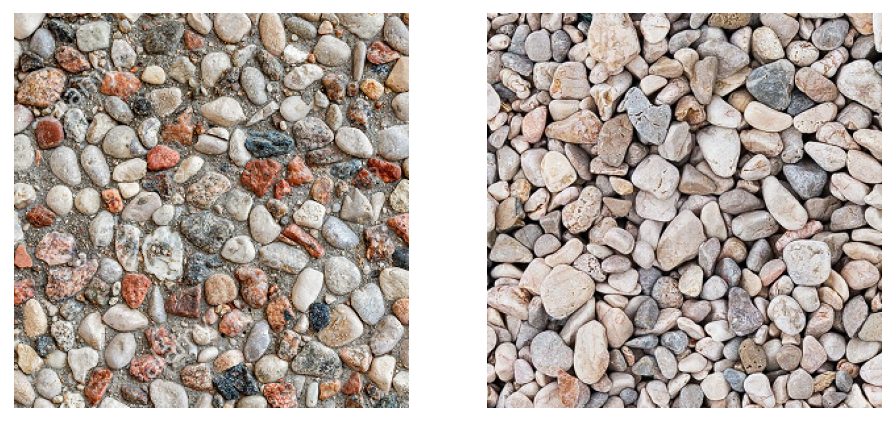

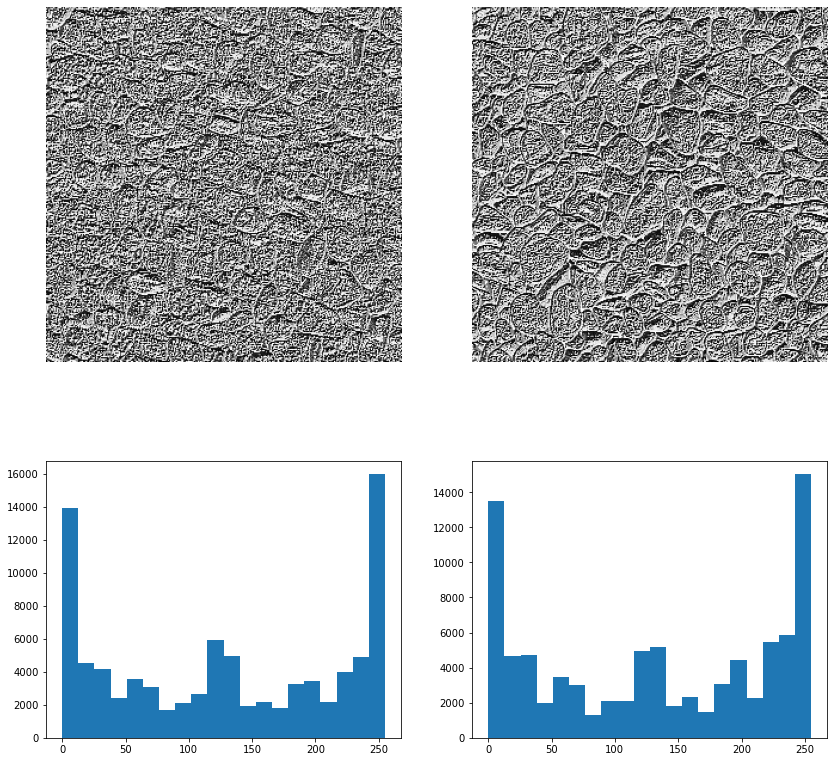

In [40]:
# Stones test

img1, img2 = load_images('./img/piedras1.png', './img/piedras2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)

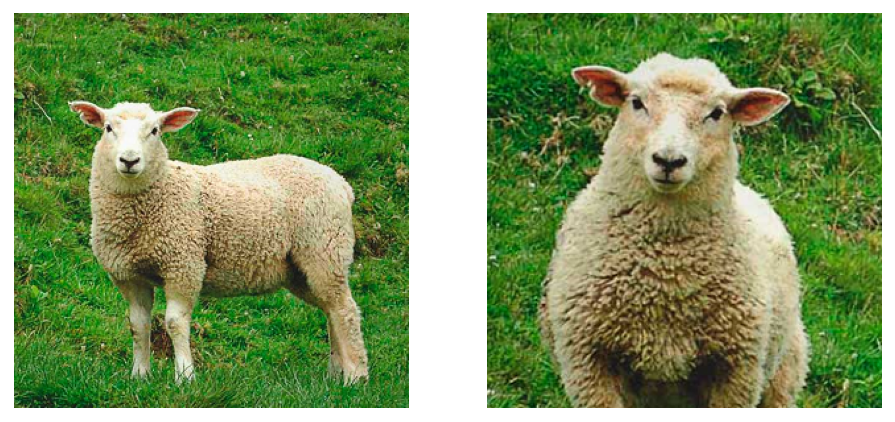

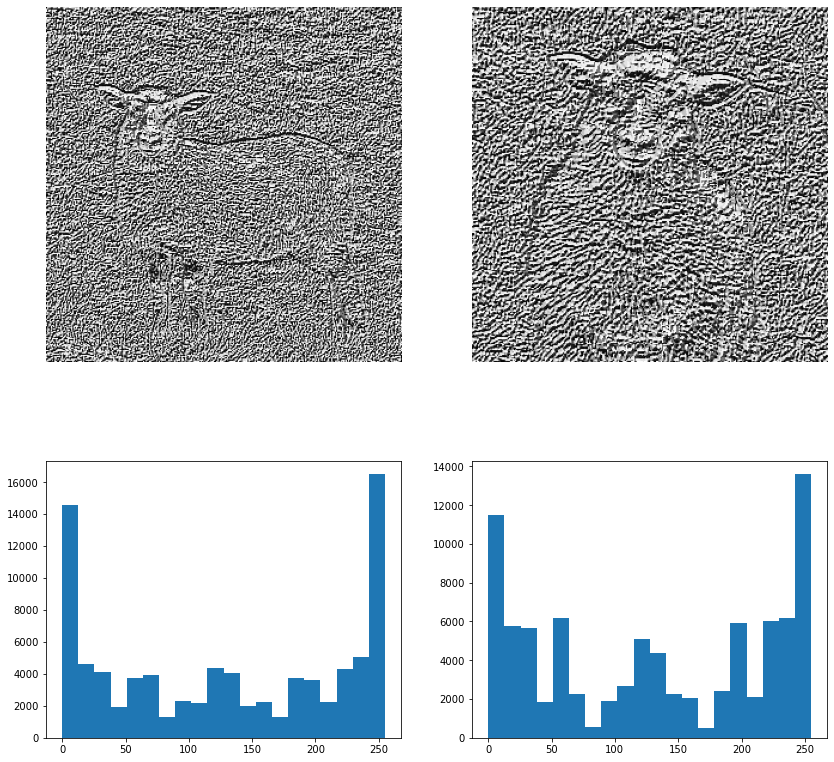

In [41]:
# Sheep test

img1, img2 = load_images('./img/oveja1.png', './img/oveja2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)

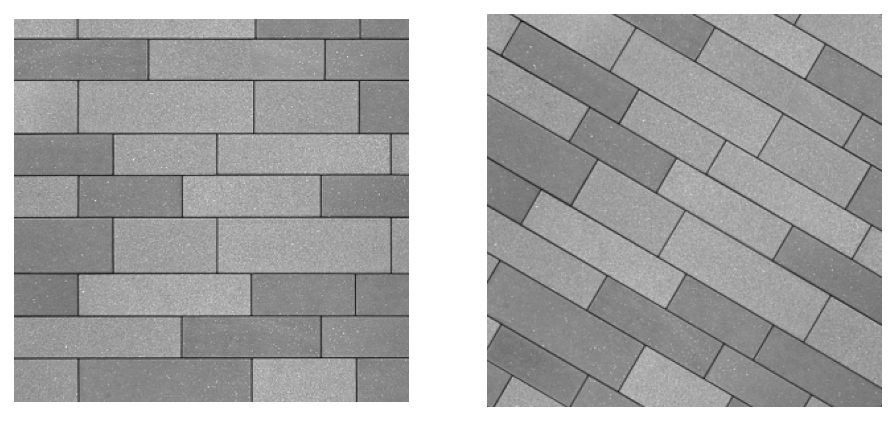

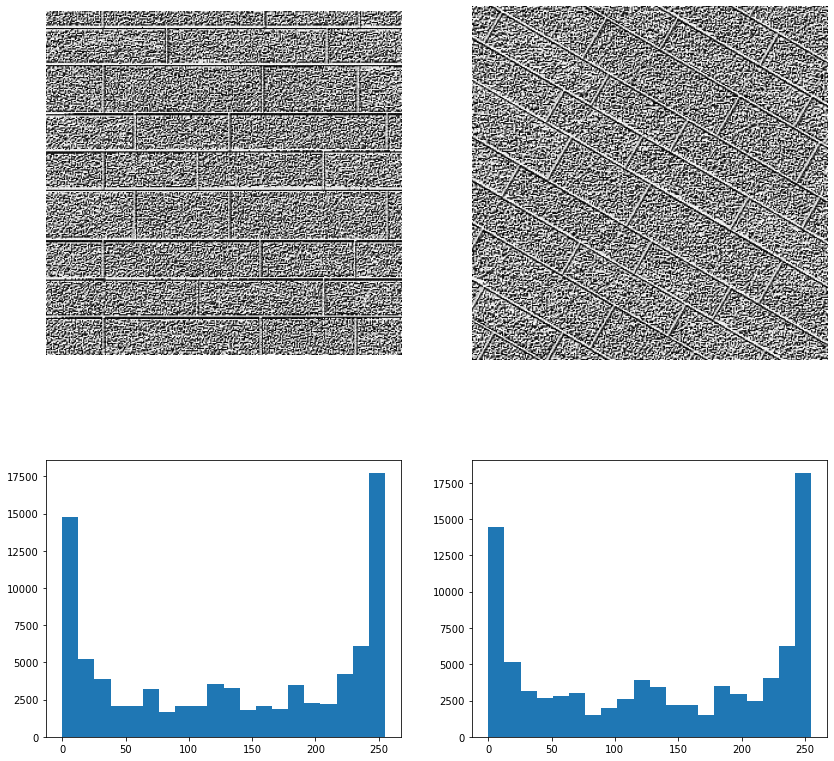

In [42]:
# Bricks test

img1, img2 = load_images('./img/ladrillos1.png', './img/ladrillos2.png')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)

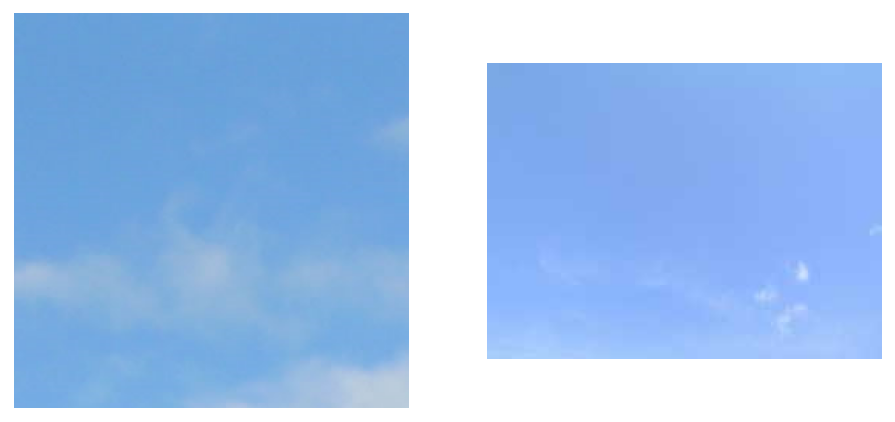

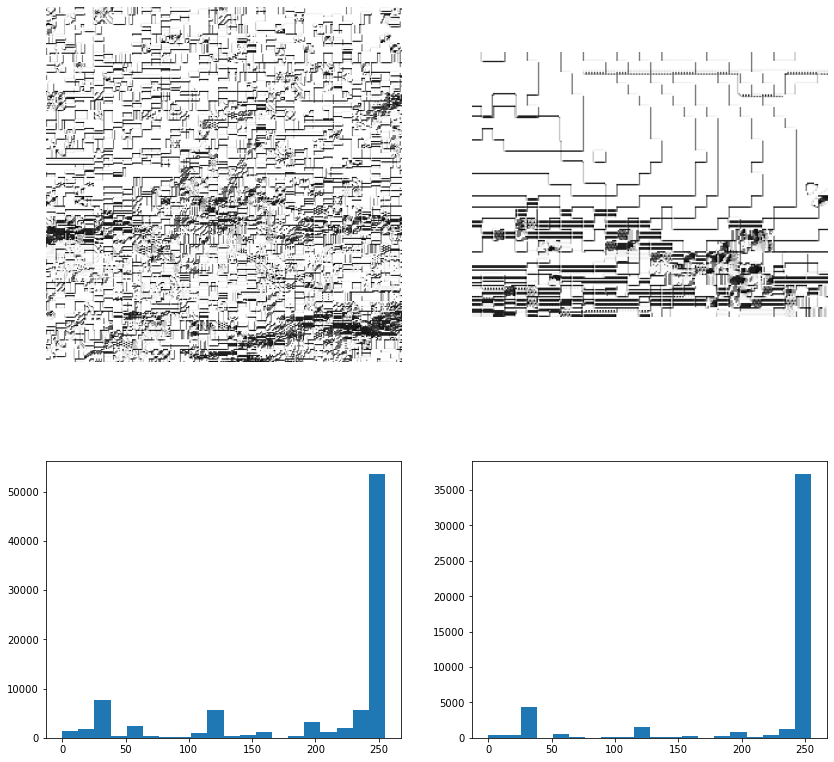

In [43]:
# Sky test

img1, img2 = load_images('./img/cielo.png', './img/cielo2.jpg')
lbp1 = lbp(img1)
lbp2 = lbp(img2)
plot_results(lbp1, lbp2)

In [66]:
# Histogram comparison
st1, st2 = load_images('./img/piedras1.png', './img/piedras2.png', show=False)
br1, br2 = load_images('./img/ladrillos1.png', './img/ladrillos2.png', show=False)
sh1, sh2 = load_images('./img/oveja1.png', './img/oveja2.png', show=False)
sk1, sk2 = load_images('./img/cielo.png', './img/cielo2.jpg', show=False)

st1_lbp = lbp(st1)
st2_lbp = lbp(st2)
br1_lbp = lbp(br1)
br2_lbp = lbp(br2)
sh1_lbp = lbp(sh1)
sh2_lbp = lbp(sh2)
sk1_lbp = lbp(sk1)
sk2_lbp = lbp(sk2)

st1_hist, _ = np.histogram(st1_lbp, bins=np.arange(2**8 + 1), density=True)
st2_hist, _ = np.histogram(st2_lbp, bins=np.arange(2**8 + 1), density=True)
br1_hist, _ = np.histogram(br1_lbp, bins=np.arange(2**8 + 1), density=True)
br2_hist, _ = np.histogram(br2_lbp, bins=np.arange(2**8 + 1), density=True)
sh1_hist, _ = np.histogram(sh1_lbp, bins=np.arange(2**8 + 1), density=True)
sh2_hist, _ = np.histogram(sh2_lbp, bins=np.arange(2**8 + 1), density=True)
sk1_hist, _ = np.histogram(sk1_lbp, bins=np.arange(2**8 + 1), density=True)
sk2_hist, _ = np.histogram(sk2_lbp, bins=np.arange(2**8 + 1), density=True)

from scipy.spatial.distance import euclidean

print("Stones 1 vs Stones 2: " + str(euclidean(st1_hist, st2_hist)))
print("Stones 1 vs Bricks 1: " + str(euclidean(st1_hist, br1_hist)))
print("Stones 1 vs Sheep 1: " + str(euclidean(st1_hist, sh1_hist)))
print("Stones 1 vs Sky 1: " + str(euclidean(st1_hist, sk2_hist)))

Stones 1 vs Stones 2: 0.019153605824116564
Stones 1 vs Bricks 1: 0.05403597058796774
Stones 1 vs Sheep 1: 0.022753777209757516
Stones 1 vs Sky 1: 0.6811038414745555
